


 # Challenge 1: NLP - Tokenization




In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# Loading necessary libraries
import pandas as pd
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from collections import Counter 

In [3]:
# Reading the file
df = pd.read_csv("ticket_Data.csv")

In [4]:
df.head()
print("\n")
df.count()
print("\n")
df.dtypes
print("\n")
df.shape


,TicketId,Description
0,1,Job re-run
1,2,Job Re-Run
2,3,the job failed due to row count mismatch betwe...
3,4,Job got failed due to name pipe error. Then jo...
4,5,Job got failed due to duplicate issue. Then is...


TicketId       6445
Description    6445
dtype: int64

TicketId        int64
Description    object
dtype: object

(6445, 2)

In [5]:
# making the text lower case
df['Description']=df['Description'].str.lower()

# Tokenize
nltk.download('punkt')
df['tokens'] = df['Description'].apply(word_tokenize)
df.head()



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

,TicketId,Description,tokens
0,1,job re-run,"[job, re-run]"
1,2,job re-run,"[job, re-run]"
2,3,the job failed due to row count mismatch betwe...,"[the, job, failed, due, to, row, count, mismat..."
3,4,job got failed due to name pipe error. then jo...,"[job, got, failed, due, to, name, pipe, error,..."
4,5,job got failed due to duplicate issue. then is...,"[job, got, failed, due, to, duplicate, issue, ..."


In [6]:
# Making Taken column a list to enable further clean-up
tokens = list(df['tokens'])
tokens[0:2] # it is list of lists

[['job', 're-run'], ['job', 're-run']]

In [7]:
# making flat list from list of lists
tokens_list = [item for sublist in tokens for item in sublist]

#tokens_list = []
#for sublist in tokens:
#    for item in sublist:
#        flat_list.append(item)

tokens_list[0:3]
print(f"\nNumber of Tokens:{len(tokens_list)}")

['job', 're-run', 'job']


Number of Tokens:82446


In [8]:
# removing punctuations (non-alphabetic)
tokens_list_alpha = [''.join(char for char in word if char not in string.punctuation) for word in tokens_list]
tokens_list_alpha[0:3]
print(f"\nNumber of alpha Tokens without punctuations: {len(tokens_list_alpha)}")


['job', 'rerun', 'job']


Number of alpha Tokens without punctuations: 82446


In [9]:
# drop empty tokens
tokens_list_alpha = [word for word in tokens_list_alpha if word]
tokens_list_alpha[0:3]
print(f"\nNumber of alpha Tokens without punctuations after removing empty tokens:{len(tokens_list_alpha)}")

['job', 'rerun', 'job']


Number of alpha Tokens without punctuations after removing empty tokens:73803


In [10]:
# Removing stop words
nltk.download('stopwords')
stop_words = stopwords.words('english')
len(stop_words)
print("\n")

tokens_list_alpha_nostop = [words for words in tokens_list_alpha if not words in stop_words]
tokens_list_alpha_nostop[0:3]
print(f"\nNumber of alpha Tokens without stopwords, punctuations, empty tokens: {len(tokens_list_alpha_nostop)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

179

['job', 'rerun', 'job']


Number of alpha Tokens without stopwords, punctuations, empty tokens: 47696


In [11]:
# Top 10 occuring tokens
high_freq = Counter(tokens_list_alpha_nostop).most_common(10)
print(f"Top 10 most occuring words are: {high_freq}")

Top 10 most occuring words are: [('job', 7087), ('issue', 3143), ('completed', 3069), ('successfully', 2551), ('due', 2242), ('rerun', 2022), ('failed', 1776), ('got', 1420), ('file', 1251), ('restarted', 1197)]


In [12]:
# adding "due", "got" in stop words list
stop_words = set(stopwords.words('english'))
#add words that aren't in the NLTK stopwords list
new_stopwords = ['due', 'got']
new_stopwords_list = stop_words.union(new_stopwords)

In [13]:
# Removing all stop words including new stop words and printing most occuring 10 tokens
tokens_list_alpha_customnostop = [words for words in tokens_list_alpha_nostop if not words in new_stopwords_list]
tokens_list_alpha_customnostop[0:3]
print(f"\nNumber of alpha Tokens without custom stopwords, punctuations, empty tokens: {len(tokens_list_alpha_customnostop)}")

# Top 10 occuring tokens after new stopwords removal
high_freq = Counter(tokens_list_alpha_customnostop).most_common(10)
print(f"Top 10 most occuring words are: {high_freq}")

['job', 'rerun', 'job']


Number of alpha Tokens without custom stopwords, punctuations, empty tokens: 44034
Top 10 most occuring words are: [('job', 7087), ('issue', 3143), ('completed', 3069), ('successfully', 2551), ('rerun', 2022), ('failed', 1776), ('file', 1251), ('restarted', 1197), ('source', 1045), ('fixed', 971)]


In [14]:
# Unique Tokens
unique_tokens = list(dict.fromkeys(tokens_list_alpha_customnostop))
unique_tokens[0:3]
print(f"\nNumber of Unique alpha Tokens without custom stopwords, punctuations, empty tokens: {len(unique_tokens)}")

['job', 'rerun', 'failed']


Number of Unique alpha Tokens without custom stopwords, punctuations, empty tokens: 821


In [15]:
Author = "Syed"
print(f"Thanks for spending time in going through the code.\n                                   Thanks & Regards, \n                                   {Author}")

Thanks for spending time in going through the code.
                                   Thanks & Regards, 
                                   Syed


# Challenge 2: FDIST, ngram 

In [16]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import random

In [17]:
df.head()
df.isnull().sum() # No nulls found

,TicketId,Description,tokens
0,1,job re-run,"[job, re-run]"
1,2,job re-run,"[job, re-run]"
2,3,the job failed due to row count mismatch betwe...,"[the, job, failed, due, to, row, count, mismat..."
3,4,job got failed due to name pipe error. then jo...,"[job, got, failed, due, to, name, pipe, error,..."
4,5,job got failed due to duplicate issue. then is...,"[job, got, failed, due, to, duplicate, issue, ..."


TicketId       0
Description    0
tokens         0
dtype: int64

In [18]:
# In order to find the key issues, the approach taken is to group the various issues into topics
# transforming description column using TfidfVectorizer with various ngram ranges to find the meaningful groupings
# Tried ngram ranges  2 & 3 and did not get meaningful results and hence choosing 4 
tfidf = TfidfVectorizer(max_df=0.95, min_df=0.01, ngram_range=(4,4), stop_words='english')
dtm = tfidf.fit_transform(df['Description'])
dtm

<6445x66 sparse matrix of type '<class 'numpy.float64'>'
	with 9464 stored elements in Compressed Sparse Row format>

In [19]:
# Using Non Negative Matrix Factorization to find 4 key topics 
nmf_model = NMF(n_components = 4, random_state = 43)
nmf_model.fit(dtm)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=4, random_state=43, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [20]:
# checking random 4 gram features generated by NMF
for i in range(10):
    random_word_id = random.randint(0, 10)
    print(tfidf.get_feature_names()[random_word_id])

duplicate data issue issue
duplicate issue issue fixed
connectivity issue issue fixed
duplicate issue issue fixed
data issue issue fixed
data issue issue fixed
connectivity issue job started
available job run file
available job run completed
data issue issue fixed


In [21]:
# Printing the top 15 words in each topic so that Topic can be named accordingly
for index,topic in enumerate(nmf_model.components_):
    print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
    print([tfidf.get_feature_names()[i] for i in topic.argsort()[-15:]])
    print('\n')

THE TOP 15 WORDS FOR TOPIC #0
['job run completed file', 'file available job run', 'source file available job', 'job got failed tdata', 'job restarted completed successfully', 'connectivity issue issue fixed', 'job executed completed successfully', 'running job got completed', 'issue job started completed', 'job got completed successfully', 'connectivity issue job started', 'failed connectivity issue job', 'job got failed connectivity', 'got failed connectivity issue', 'run job completed successfully']


THE TOP 15 WORDS FOR TOPIC #1
['unavailability issue fixed job', 'file unavailability issue fixed', 'failed file unavailability issue', 'duplicate issue issue fixed', 'got failed file unavailability', 'job got failed data', 'pipe error database connection', 'duplicate data issue issue', 'job abended duplicate data', 'abended duplicate data issue', 'data issue issue fixed', 'issue issue fixed job', 'fixed job restarted completed', 'issue fixed job restarted', 'job restarted completed su

In [22]:
# Naming the Topics based on the frequent 4 grams
failure_reason = {0: 'Connectivity Issue', 1: 'File Unavailability', 2: 'File/Job lock issue', 3: 'Duplicate Data Issue'}

print(f" Key issues found in the ticket database are: \n {failure_reason}")

 Key issues found in the ticket database are: 
 {0: 'Connectivity Issue', 1: 'File Unavailability', 2: 'File/Job lock issue', 3: 'Duplicate Data Issue'}


In [23]:
Author = "Syed"
print(f"Thanks for spending time in going through the code.\n                                   Thanks & Regards, \n                                   {Author}")

Thanks for spending time in going through the code.
                                   Thanks & Regards, 
                                   Syed


# Challenge 3: Document Similarity

In [24]:
# Downloading spaCy's large english library to convert the document is vectors for comparison/similarity

#!python -m spacy download en_core_web_lg
#! python -m spacy link en_core_web_lg en --force

In [25]:
# Import spaCy and load the language library
import spacy
nlp = spacy.load('en')

In [26]:
# Reading the file as DF and using encoding='cp1252' as utf-8 is failing
df_req = pd.read_csv ("Input_RFP - Requirements.csv", encoding='cp1252')
df_req.head()

,SNO,ReqID,Requirement
0,1,FR1.07,The System will apply business rules to facili...
1,2,FR1.08,The System will establish unique date-specific...
2,3,FR1.09,The System will provide the flexibility to enr...
3,4,FR1.10,The System will maintain a record of benefit a...
4,5,FR1.100,The Solution shall provide details on the Web ...


In [27]:
# Incoming New Requirement
# The second requirement is a mixture of text from two requirements - FR1.09 and FR1.100 and the requirement is expected to match 1.100
#new_req = str(u"support proper processing of claims for dually eligible")
new_req = str(u"Enroll Members in Grievance Web portal")

In [28]:
# Comparing the new requirement with the list of eligible requirements to find the cosine similarity score
# Store the similairy of each existing document in a list sim_score
sim_score = []
for i in range(len(df_req)):
  sim_score.append(nlp(new_req).similarity(nlp(df_req['Requirement'][i])))
  #print ("\n")

In [29]:
print(f"Similarity scores of the new requirement against existing requirements are: \n {sim_score}")

Similarity scores of the new requirement against existing requirements are: 
 [0.7495515653983238, 0.7464404238579798, 0.7505196107291057, 0.7044834696461929, 0.7934630317865315, 0.7508393262405706, 0.7283934893010816, 0.7371118103200051, 0.7286887917569977, 0.703434116647569]


In [30]:
# Identifying the max similarity score, its index position, correspoding requirement and complete requirements text

# Finding Max value and Index
max_value = max(sim_score)
max_index = sim_score.index(max_value)

# Printing the Results
print (f"The Index in which Max similarity score exists is: {max_index} and the score is: {max_value}")
print (f"\n The New document is matching upto {max_value.round(3)*100}% with Requirement ID {df_req.iloc[max_index,1]}")
#print (df_req[df_req.index.values==max_index])
print (f"\n The complete requirement of {df_req.iloc[max_index,1]} is given below: \n {df_req.iloc[max_index,2]}")

The Index in which Max similarity score exists is: 4 and the score is: 0.7934630317865315

 The New document is matching upto 79.3% with Requirement ID FR1.100

 The complete requirement of FR1.100 is given below: 
 The Solution shall provide details on the Web portal on how to file a grievance


In [31]:
print(f"Thanks for spending time in going through the code.\n                                   Thanks & Regards, \n                                   {Author}")

Thanks for spending time in going through the code.
                                   Thanks & Regards, 
                                   Syed


# Challenge 4: Word Cloud generation

In [32]:
# Importing necessaer libraries
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image # for custom shape word cloud
import numpy as np


In [33]:
# Reading the html file
soup = BeautifulSoup(open("leaderTalk.html", 'r'))

# # kill all script and style elements
# for script in soup(["script", "style"]):
#     script.extract()    # rip it out

# # get text
# text = soup.get_text()

# # break into lines and remove leading and trailing space on each
# lines = (line.strip() for line in text.splitlines())
# # break multi-headlines into a line each
# chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
# # drop blank lines
# text = '\n'.join(chunk for chunk in chunks if chunk)

In [34]:
question = 'what is your favorite thing about cognizant?'

In [35]:
comments = ''
for summary in soup.findAll('table'):
    for tr in summary.find_all('tr'):
        sel_ques_flag = False
        for td in tr.find_all('td'):
            if sel_ques_flag:
                comments += td.find('p').text.lower().strip()
            if td.find('p').text.lower().strip() == question:
                sel_ques_flag = True

comments

'entrepreneural culture and focus on doing the right thing by the customercelebrating work and can do attitudepassion to challenge status quo and help customer think about possibilities of the\n                                                            future1. we are a very ethical company, always try to do the right thing, treat people\n                                                            well and create the proper support system. the true testament is that my daughter\n                                                            joined working here in cognizant and i wouldn’t let her join a company that i didn’t\n                                                            feel good about.\n                                                            2. very entrepreneurial culture, you get as much of a chance to advance yourself\n                                                            as you’re capable of moving forward. i run my role as if it was my own company.if we are 

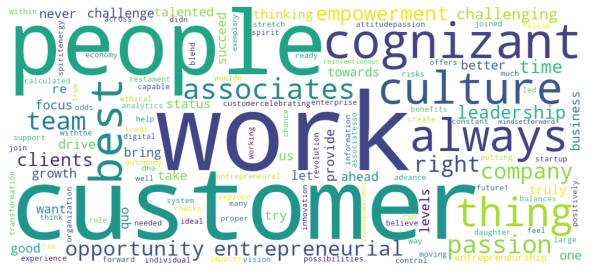

In [36]:
wordcloud = WordCloud(width = 1000, height = 450, 
                background_color ='white', stopwords=STOPWORDS, collocations = True,
                min_font_size = 10).generate(comments)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show(); 

In [37]:
# Uploading Shape for word cloud
mask = np.array(Image.open('upvote.png'))

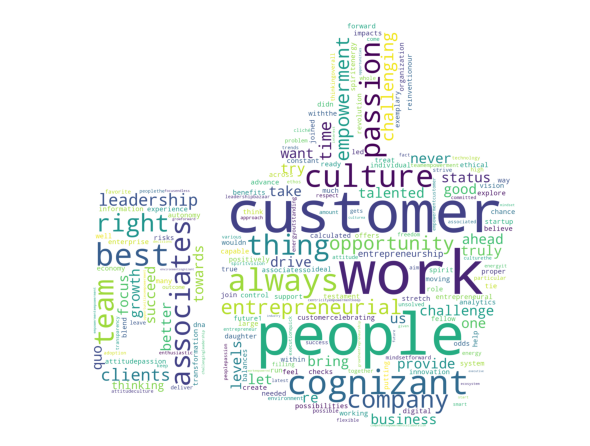

In [38]:
# Word Cloud by avoiding more than 1 tokens - to avoid duplicates
# Custom shape cloud
wordcloud = WordCloud(width = 1000, height = 450, mask=mask,
                background_color ='white', stopwords=STOPWORDS, collocations = False,
                min_font_size = 10).generate(comments)
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show();

In [39]:
print(f"Thanks for spending time in going through the code.\n                                   Thanks & Regards, \n                                   {Author}")

Thanks for spending time in going through the code.
                                   Thanks & Regards, 
                                   Syed
